In [9]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [21]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [22]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [24]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:3],df.iloc[:,0],test_size=0.2)

In [25]:
x_train.head(2)

,Age,Fare
790,29.699118,7.75
305,0.920000,151.55


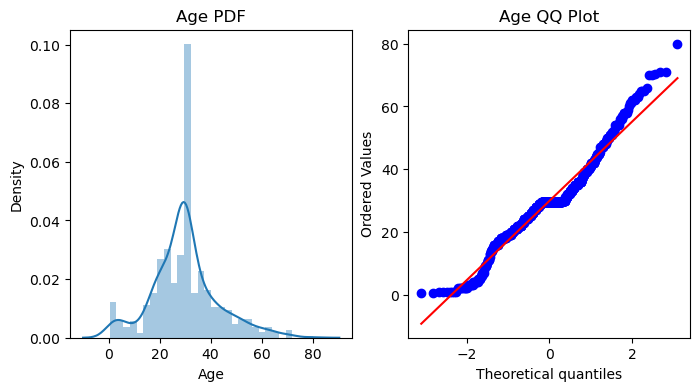

In [38]:
plt.figure(figsize=(8,4))
plt.subplot(121 )
sns.distplot(x_train['Age'])
plt.title('Age PDF');

plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()

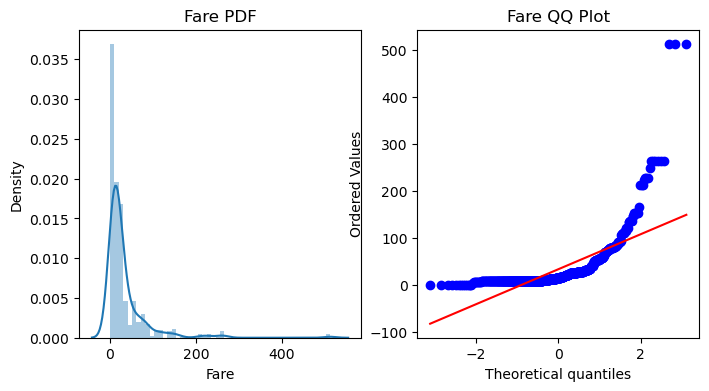

In [39]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF');

plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [40]:
# As the log1p=log(x+1),because if x=0 then log(0) is not defiend so that we are using it
log_trf = FunctionTransformer(func=np.log1p)

In [41]:
x_train_transformed = log_trf.fit_transform(x_train)
x_test_transformed = log_trf.transform(x_test)

In [42]:
clf1 = LogisticRegression().fit(x_train,y_train)
clf2 = LogisticRegression().fit(x_train_transformed,y_train)

In [43]:
y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test_transformed)

In [46]:
print(f"Accuracy {accuracy_score(y_test,y_pred1)}")
print(f"Accuracy of transformed data {accuracy_score(y_test,y_pred2)}")

Accuracy 0.6536312849162011
Accuracy of transformed data 0.6759776536312849


Observation: AS the logistic regression is depend on normal distributation we are getting good result

In [62]:
trf = ColumnTransformer([
    ('fare_trf',FunctionTransformer(func=np.log1p),['Fare'])
],remainder='passthrough')

In [63]:
x_train_transformed1 = trf.fit_transform(x_train)
x_test_transformed1 = trf.fit_transform(x_test)

In [64]:
clf3 = LogisticRegression().fit(x_train,y_train)
clf4 = LogisticRegression().fit(x_train_transformed1,y_train)

In [70]:
y_pred3=clf3.predict(x_test)
y_pred4=clf4.predict(x_test_transformed1)

In [71]:
print(f"Accuracy {accuracy_score(y_test,y_pred3)}")
print(f"Accuracy of transformed data {accuracy_score(y_test,y_pred4)}")

Accuracy 0.6536312849162011
Accuracy of transformed data 0.6759776536312849


In [72]:
 x_train_transformed1 = pd.DataFrame(x_train_transformed1,columns=x_train.columns)

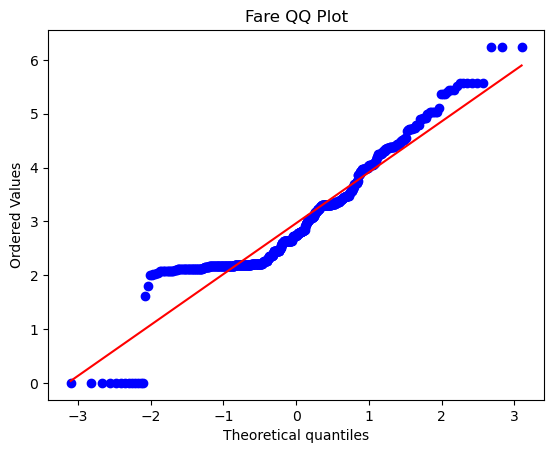

In [73]:
stats.probplot(x_train_transformed1['Age'],dist="norm",plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [74]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6442446941323345


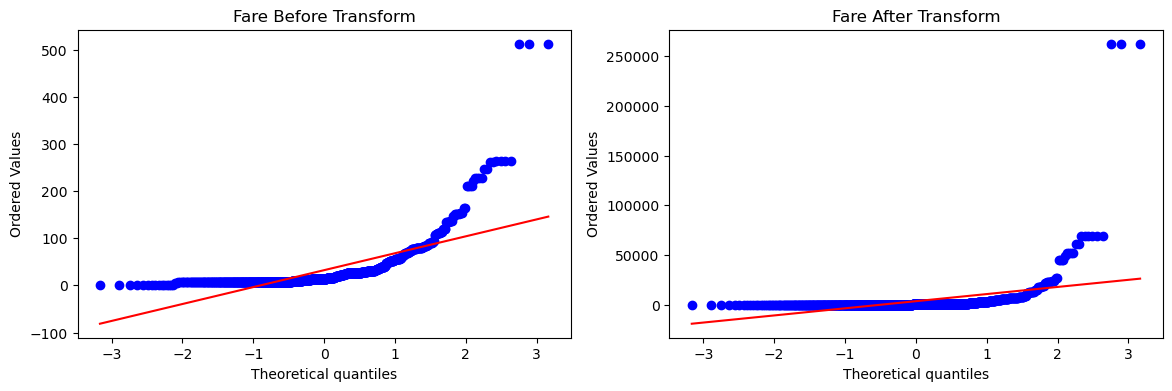

In [81]:
apply_transform(lambda x:x**2)